In [9]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

%matplotlib inline

<AxesSubplot:>

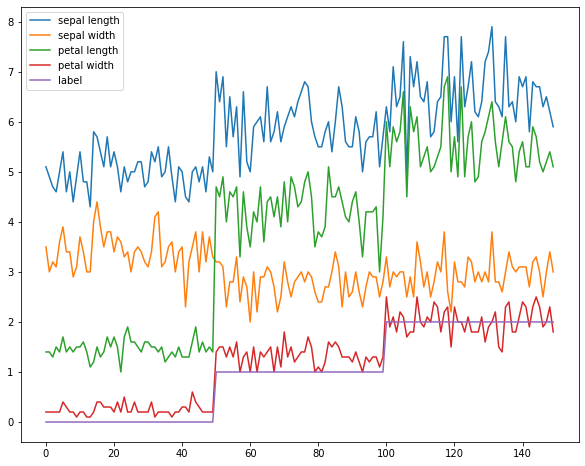

In [10]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
data['label'] = iris.target
data.plot(figsize=(10,8))

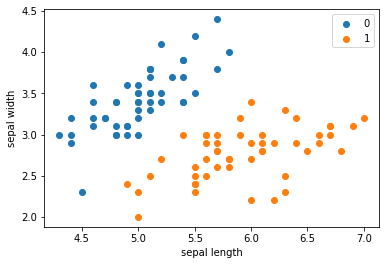

In [11]:
plt.scatter(data[:50]['sepal length'], data[:50]['sepal width'], label='0')  #将数据的前50个数据绘制散点图，令其标签为0
plt.scatter(data[50:100]['sepal length'], data[50:100]['sepal width'], label='1') #将数据的50到100个数据绘制散点图，令其标签为1，这里只选取了0,1两个特征
plt.xlabel('sepal length') #将散点图的x轴命名为sepal length
plt.ylabel('sepal width') #将散点图的y轴命名为sepal width
plt.legend() #显示图例的位置，自适应方式

In [12]:
origin = data[:100].sample(frac=1).reset_index(drop=True)
X = np.array(origin[['sepal length', 'sepal width']])
Y = np.array(origin['label'])
Y = [-1 if y == 0 else 1 for y in Y ]

In [13]:
class Perceptron:
    def __init__(self, eta):
        self.w = np.ones(2)
        self.b = 0.0
        self.eta = eta
    
    def sgn(self, x):
        return np.dot(self.w, x) + self.b
    
    def fit(self, x_train, y_train):
        while True:
            wrong_cnt = 0
            for x, y in list(zip(x_train, y_train)):
                if y * self.sgn(x) < 0:
                    self.w += self.eta * y * x
                    self.b += self.eta * y
                    wrong_cnt += 1
            if wrong_cnt == 0:
                print("Perceptron Finished!")
                return

model = Perceptron(0.1)
model.fit(X, Y)
model.w, model.b

Perceptron Finished!


(array([  8.24, -10.42]), -13.199999999999969)

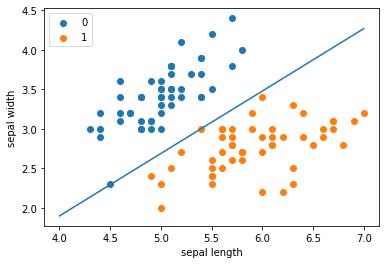

In [14]:
x_points = np.linspace(4, 7,10) #在4到7的闭区间，划分为10个数据点
y_ = -(model.w[0]*x_points + model.b)/model.w[1] #绘plt.plot(data[:50], data[:50], 'bo', color='blue', label='0') #将前50个数据绘制成散点图
plt.plot(x_points, y_)

plt.scatter(data[:50]['sepal length'], data[:50]['sepal width'], label='0')  #将数据的前50个数据绘制散点图，令其标签为0
plt.scatter(data[50:100]['sepal length'], data[50:100]['sepal width'], label='1')
plt.xlabel('sepal length') #散点图横坐标为sepal length
plt.ylabel('sepal width') #散点图纵坐标为sepal length
plt.legend()